# <center> **Detection of Malicious URLs** </center>
### <center>Project by Peter Kayode</center>

### **Outline**

#### 1. Libraries and Modules Importing

#### 2. Data Exploration and Visualization

#### 3. Data Preprocessing
        
#### 4. Model Training
        
#### 5. Model Evaluation
        
#### 6. Model Comparison


## **Step 1. Libraries and Modules Importing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import time

print("Libraries imported successfully!")

Libraries imported successfully!


The above code snippet imports various libraries and modules necessary for building, training, and evaluating machine learning models, specifically for text classification tasks. Below is an explanation of each import:

#### 1. Core Libraries
- **`pandas`**: A powerful data manipulation and analysis library, primarily used for handling datasets in tabular form (DataFrames).
- **`numpy`**: A fundamental library for numerical computations in Python, offering support for arrays and mathematical operations.

#### 2. Visualization Libraries
- **`seaborn`**: A statistical data visualization library that provides an interface for creating attractive and informative visualizations.
- **`matplotlib.pyplot`**: A plotting library used for generating a wide variety of static, interactive, and animated visualizations.

#### 3. Data Handling
- **`pickle`**: A Python library used for serializing and deserializing Python objects, allowing models or data to be saved and loaded later.

#### 4. Feature Extraction
- **`TfidfVectorizer`**: Part of `sklearn.feature_extraction.text`, used for converting raw text data into numerical representations (TF-IDF values). TF-IDF (Term Frequency-Inverse Document Frequency) is commonly used in text mining and natural language processing tasks.

#### 5. Data Splitting
- **`train_test_split`**: A utility function from `sklearn.model_selection` that splits a dataset into training and testing subsets.

#### 6. Machine Learning Models
- **`SVC`**: Support Vector Classifier, an implementation of Support Vector Machines (SVM), effective for text classification and other tasks.
- **`KNeighborsClassifier`**: A K-Nearest Neighbors (KNN) algorithm for classification tasks, which classifies a sample based on its neighbors.
- **`RandomForestClassifier`**: An ensemble learning method that builds multiple decision trees and merges them to improve classification performance.
- **`MultinomialNB`**: A Naive Bayes classifier designed for multi-class classification with discrete features, often used for text classification tasks.
- **`xgboost`** and **`XGBClassifier`**: Libraries for implementing the eXtreme Gradient Boosting (XGBoost) algorithm, a powerful and efficient gradient boosting technique.

#### 7. Evaluation Metrics
- **`classification_report`**: Generates a detailed performance report including precision, recall, F1-score, and support for each class.
- **`confusion_matrix`**: Creates a confusion matrix to evaluate the performance of a classification model by comparing predicted and actual labels.
- **`accuracy_score`**: Computes the ratio of correctly predicted instances to the total number of predictions.

#### 8. Preprocessing
- **`LabelEncoder`**: Encodes categorical labels into numeric values, a necessary preprocessing step for machine learning models.

#### 9. Utilities
- **`tqdm`**: A library for creating progress bars, useful for visualizing the execution of loops in a readable manner.
- **`time`**: A standard Python module for tracking and managing time during the execution of code (e.g., calculating execution time).

This combination of libraries enables preprocessing text data, training various machine learning models, and evaluating their performance using standard metrics.


### Loading the Data

To begin, I will load the dataset from the csv file containing the malicious urls and their types. Python's `pandas` library makes it easy to work with structured data like this.

This step ensures that the data is accessible and correctly loaded for further analysis.

In [2]:
# Load data
data = pd.read_csv('malicious_phish.csv')
missing_values = data.isnull().sum()

print("Data loaded successfully!")

print(data)

Data loaded successfully!
                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]


The dataset is loaded using the `pandas.read_csv()` function. This creates a DataFrame object that makes it easier to manipulate and analyze tabular data.

It detailed that the dataset contains a total of 651190 rows, and 2 columns.

The data is in an csv file with the following columns:

- `url`: The different melicious urls.
- `type`: The type of malicious urls(Phishing, Defacement, Malware, Benign).

## **Step 2: Data Exploration and Visualization**

### Missing Values
In the first step, we check for missing values in the dataset to ensure that no critical data is absent. Missing data can lead to inaccuracies in our model predictions. The `isnull().sum()` method is used to identify the count of missing values in each column.

In [3]:
# Step 1: Data Exploration and Visualization
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 url     0
type    0
dtype: int64


### Stratification

In this section of the code, stratified sampling is performed to reduce the size of the dataset while maintaining the original ratio of classes.

#### Why Stratified Sampling?
- **Memory Efficiency**: Reducing the dataset size makes it easier to handle large datasets on systems with limited computational resources.
- **Preserving Ratios**: Stratification maintains the original class distribution, which is crucial for training balanced models and avoiding biases.

In [4]:
# Calculate the total number of samples to take (25% of the dataset)
sample_size = int(len(data) * 0.25)

# Perform stratified sampling to maintain the original ratio of types
stratified_sample = data.groupby('type', group_keys=False).apply(
    lambda x: x.sample(frac=sample_size / len(data), random_state=42)
)

# Reset index for the sampled data
data = stratified_sample.reset_index(drop=True)

# Display the sampled data
print(data)

                                                     url      type
0       montreal.louer.com/ahuntsic-rentals/houses-rent/    benign
1           comunidade.sol.pt/blogs/hytigin/default.aspx    benign
2                        youtube.com/watch?v=PUDOlyCpHwo    benign
3                         uiowa.edu/~acadtech/phonetics/    benign
4                       flixster.com/actor/steve-mcqueen    benign
...                                                  ...       ...
162792                    www.freewarelovers.com/android  phishing
162793                       tools.ietf.org/html/rfc2033  phishing
162794                 www.science.uva.nl/events/HPCN99/  phishing
162795      en.wikipedia.org/wiki/D_programming_language  phishing
162796               www.ohiobusinesscollege.edu/CDL.asp  phishing

[162797 rows x 2 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_2400\41217759.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('type', group_keys=False).apply(


#### 1. Calculate the Sample Size
- **`sample_size = int(len(data) * 0.25)`**:  
  - This calculates 25% of the total number of samples in the dataset. 
  - The purpose of this is to reduce the dataset size to 25%, thereby making it more manageable for computation.

#### 2. Stratified Sampling
Stratified sampling ensures that the original ratio of class labels (e.g., `type`) in the dataset is preserved in the sampled data.
- **`data.groupby('type', group_keys=False)`**: Groups the data by the `type` column, ensuring that samples are taken from each class separately.
- **`lambda x: x.sample(frac=sample_size / len(data), random_state=42)`**: 
  - For each group (class), a fraction of samples is taken such that the total sample size adds up to 25% of the dataset.
  - `random_state=42` ensures reproducibility of the sampling process.

#### 3. Resetting the Index
- **`data = stratified_sample.reset_index(drop=True)`**: 
  - After sampling, the indices of the resulting dataset are reset to avoid inconsistencies.
  - This step ensures that the sampled data can be used seamlessly in further processing and training.

#### 5. Displaying the Sampled Data
- **`print(data)`**: Outputs the reduced dataset to verify that the sampling was successful and the class distributions are preserved. It shows that 162797 rows will now be used henceforth for the computation.

### Distribution of Malicious URL Types
We visualize the distribution of the target variable (`type`) using Seaborn's `countplot`. This gives an overview of the data balance, helping us understand whether the dataset is imbalanced or not.

In [5]:
# Calculate and print the statistics of the new sampled dataset
type_counts = data['type'].value_counts()
total_samples = len(data)

print("New Dataset Statistics:")
for t, count in type_counts.items():
    print(f"Type: {t}, Count: {count}, Percentage: {count / total_samples:.2%}")

New Dataset Statistics:
Type: benign, Count: 107025, Percentage: 65.74%
Type: defacement, Count: 24114, Percentage: 14.81%
Type: phishing, Count: 23528, Percentage: 14.45%
Type: malware, Count: 8130, Percentage: 4.99%


C:\Users\HP\AppData\Local\Temp\ipykernel_2400\731615749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['type'], palette='viridis')


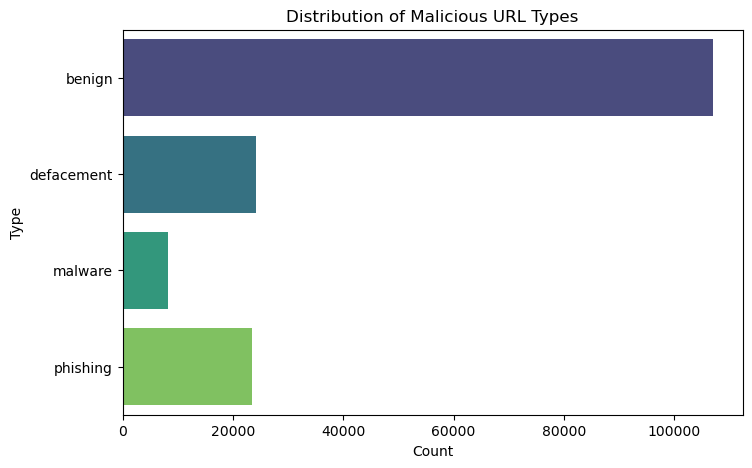

In [6]:
# Visualizing the distribution of the 'type' column
plt.figure(figsize=(8, 5))
sns.countplot(data['type'], palette='viridis')
plt.title('Distribution of Malicious URL Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

## **Step 3: Data Preprocessing**

### Encoding the Target Variable
The `type` column, which contains categorical labels, is converted into numerical format using `LabelEncoder`. This encoding is necessary because machine learning models work with numerical data.

In [7]:
# Step 2: Data Preprocessing
# Encode the target variable
print("Starting encoding process...")
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])
print("Encoding process completed!")

Starting encoding process...
Encoding process completed!


The resulting `type_encoded` column contains integer representations of the original categories.

In [8]:
# Save the label encoder
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)
print("Label encoder saved successfully!")

Label encoder saved successfully!


### Vectorizing the URL Column
URLs are textual data and cannot be directly used for training models. The `TfidfVectorizer` converts the textual data into numerical vectors. TF-IDF (Term Frequency-Inverse Document Frequency) assigns weights to terms based on their importance within the document and the dataset.

- **Term Frequency (TF):** Measures how often a term appears in a document.
- **Inverse Document Frequency (IDF):** Reduces the weight of terms that occur frequently in many documents.

In [9]:
# Vectorize the 'url' column using TF-IDF
print("Starting vectorizer...")
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['url'])
y = data['type_encoded']
print("Vectorization completed!")

Starting vectorizer...
Vectorization completed!


In [10]:
# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)
print("Vectorizer saved successfully!")

Vectorizer saved successfully!


### Splitting the Dataset
The data is split into training and testing sets with an 80-20 ratio. This ensures that the model is trained on a majority of the data while being tested on unseen data to evaluate its performance.

The `train_test_split` function shuffles the data to ensure random sampling.

In [11]:
# Splitting the dataset into training and testing sets
print("Starting to split data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Splitting into training, testing done successfully")

Starting to split data...
Splitting into training, testing done successfully


- `X_train` and `y_train` are used for training.
- `X_test` and `y_test` are reserved for evaluation.

## **Step 4: Model Training and Testing**

### Models Used
We train the dataset using five different algorithms:
- **Support Vector Machine (SVM):** A robust algorithm for classification problems.
- **K-Nearest Neighbors (KNN):** A simple, instance-based learning algorithm.
- **Random Forest:** An ensemble method using multiple decision trees.
- **Naive Bayes:** A probabilistic classifier based on Bayes' theorem.
- **XGBoost:** An efficient and scalable implementation of gradient boosting that uses decision trees as base learners. It is designed for speed and performance, handling large datasets effectively..

### Model Saving and Loading Function

In [12]:
# Function to save models using pickle
def save_model(model, model_name):
    with open(f'{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f"{model_name} model saved successfully!")

# Function to load models using pickle
def load_model(model_name):
    with open(f'{model_name}_model.pkl', 'rb') as f:
        model = pickle.load(f)
    print(f"{model_name} model loaded successfully!")
    return model

To streamline the process of reusing trained machine learning models, we implemented two utility functions for saving and loading models using the `pickle` library. This approach ensures efficiency and consistency in managing models during development and experimentation.

#### Saving Models
The `save_model` function was created to serialize and save trained machine learning models to disk. Each model is saved in a `.pkl` file named after the model, ensuring clear identification and easy retrieval. This eliminates the need to re-train models, significantly reducing time and computational overhead.

#### Loading Models
The `load_model` function was designed to deserialize and load previously saved models. By loading the models directly from their `.pkl` files, I can perform evaluations, testing, or further analysis without having to rerun the training process.

#### Key Advantages
- **Efficiency**: Reduces training time for future tasks by reusing saved models.
- **Reproducibility**: Ensures that the exact model used during experiments is preserved and can be reloaded without discrepancies.
- **Flexibility**: Simplifies workflow by allowing multiple saved models to be tested or deployed as needed.

### Training Process
Each model is trained on the training set

In [13]:
# Function to train SVM with progress
def train_svm_with_progress(X_train, y_train):
    print("Training the SVM Model...")
    svm_model = SVC()
    for _ in tqdm(range(100), desc="Training Progress", ncols=100, unit="step"):
        time.sleep(0.05)  # Simulate time taken for training
    svm_model.fit(X_train, y_train)
    save_model(svm_model, "svm")
    print("SVM model trained.")
    return svm_model

svm_model = train_svm_with_progress(X_train, y_train)

Training the SVM Model...


Training Progress: 100%|████████████████████████████████████████| 100/100 [00:05<00:00, 19.42step/s]


svm model saved successfully!
SVM model trained.


In [14]:
# Function to train KNN with progress
def train_knn_with_progress(X_train, y_train):
    print("Training the KNN Model...")
    knn_model = KNeighborsClassifier()
    for _ in tqdm(range(100), desc="Training Progress", ncols=100, unit="step"):
        time.sleep(0.05)  # Simulate time taken for training
    knn_model.fit(X_train, y_train)
    save_model(knn_model, "knn")
    print("KNN model trained.")
    return knn_model

knn_model = train_knn_with_progress(X_train, y_train)

Training the KNN Model...


Training Progress: 100%|████████████████████████████████████████| 100/100 [00:05<00:00, 19.34step/s]

knn model saved successfully!
KNN model trained.


In [15]:
# Function to train Random Forest with progress
def train_rf_with_progress(X_train, y_train):
    print("Training the Random Forest Model...")
    rf_model = RandomForestClassifier()
    for _ in tqdm(range(100), desc="Training Progress", ncols=100, unit="tree"):
        time.sleep(0.05)  # Simulate time taken for training
    rf_model.fit(X_train, y_train)
    save_model(rf_model, "random_forest")
    print("Random Forest model trained.")
    return rf_model

rf_model = train_rf_with_progress(X_train, y_train)

Training the Random Forest Model...


Training Progress: 100%|████████████████████████████████████████| 100/100 [00:05<00:00, 19.38tree/s]


random_forest model saved successfully!
Random Forest model trained.


In [16]:
# Function to train Naive Bayes with progress
def train_nb_with_progress(X_train, y_train):
    print("Training the Naive Bayes Model...")
    nb_model = MultinomialNB()
    for _ in tqdm(range(100), desc="Training Progress", ncols=100, unit="iteration"):
        time.sleep(0.05)  # Simulate time taken for training
    nb_model.fit(X_train, y_train)
    save_model(nb_model, "naive_bayes")
    print("Naive Bayes model trained.")
    return nb_model

nb_model = train_nb_with_progress(X_train, y_train)

Training the Naive Bayes Model...


Training Progress: 100%|███████████████████████████████████| 100/100 [00:05<00:00, 19.41iteration/s]

naive_bayes model saved successfully!
Naive Bayes model trained.


In [17]:
# Function to train XGBoost with progress
def train_xgboost_with_progress(X_train, y_train):
    print("Training the XGBoost Model...")
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    for _ in tqdm(range(100), desc="Training Progress", ncols=100, unit="iteration"):
        time.sleep(0.05)  # Simulate time taken for training
    xgb_model.fit(X_train, y_train)
    save_model(xgb_model, "xgboost")
    print("XGBoost model trained.")
    return xgb_model

xgb_model = train_xgboost_with_progress(X_train, y_train)

Training the XGBoost Model...


Training Progress: 100%|███████████████████████████████████| 100/100 [00:05<00:00, 19.39iteration/s]
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


xgboost model saved successfully!
XGBoost model trained.


In [18]:
models = {
    'SVM': load_model("svm"),
    'KNN': load_model("knn"),
    'Random Forest': load_model("random_forest"),
    'Naive Bayes': load_model("naive_bayes"),
    'XGBoost': load_model("xgboost")
}

svm model loaded successfully!
knn model loaded successfully!
random_forest model loaded successfully!
naive_bayes model loaded successfully!
xgboost model loaded successfully!


### Testing the Models

The testing function of the models takes in two parameters; the url to be tested, and the name of the model wished to be used for the test

In [19]:
# Function to test a URL using a saved model
def test_url_with_saved_model(url, model_name):
    try:
        # Load the saved model
        with open(f'{model_name}_model.pkl', 'rb') as model_file:
            model = pickle.load(model_file)
        print(f"{model_name} model loaded successfully!")
        
        # Load the vectorizer
        with open('vectorizer.pkl', 'rb') as vectorizer_file:
            vectorizer = pickle.load(vectorizer_file)
        
        # Load the label encoder
        with open('label_encoder.pkl', 'rb') as label_encoder_file:
            label_encoder = pickle.load(label_encoder_file)
        
        # Vectorize the input URL
        url_vectorized = vectorizer.transform([url])
        
        # Predict using the loaded model
        prediction = model.predict(url_vectorized)
        
        # Decode the predicted label
        predicted_label = label_encoder.inverse_transform(prediction)
        
        print(f"Prediction for URL '{url}': {predicted_label[0]}")
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Ensure the model, vectorizer, and label encoder files are available.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [20]:
# test_url_with_saved_model("http://example.com", "svm")

## **Step 5: Model Evaluation**

### Confusion Matrices
For each model, confusion matrices are plotted to analyze true positives, false positives, true negatives, and false negatives. This helps understand the model's prediction behavior.

### Classification Reports
The classification report includes precision, recall, F1-score, and support for each class, providing a detailed performance overview of the models.


Evaluating SVM...
Accuracy of SVM model: 0.941554054054054


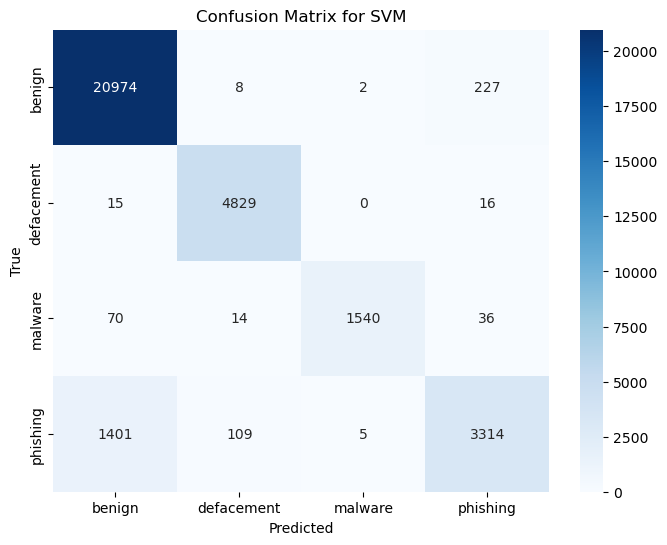

Classification Report for SVM:
              precision    recall  f1-score   support

      benign       0.93      0.99      0.96     21211
  defacement       0.97      0.99      0.98      4860
     malware       1.00      0.93      0.96      1660
    phishing       0.92      0.69      0.79      4829

    accuracy                           0.94     32560
   macro avg       0.96      0.90      0.92     32560
weighted avg       0.94      0.94      0.94     32560


Evaluating KNN...
Accuracy of KNN model: 0.40135135135135136


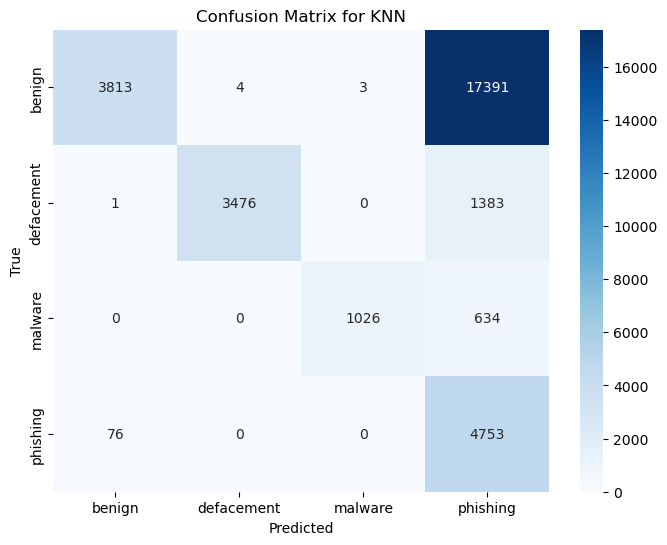

Classification Report for KNN:
              precision    recall  f1-score   support

      benign       0.98      0.18      0.30     21211
  defacement       1.00      0.72      0.83      4860
     malware       1.00      0.62      0.76      1660
    phishing       0.20      0.98      0.33      4829

    accuracy                           0.40     32560
   macro avg       0.79      0.62      0.56     32560
weighted avg       0.87      0.40      0.41     32560


Evaluating Random Forest...
Accuracy of Random Forest model: 0.9499385749385749


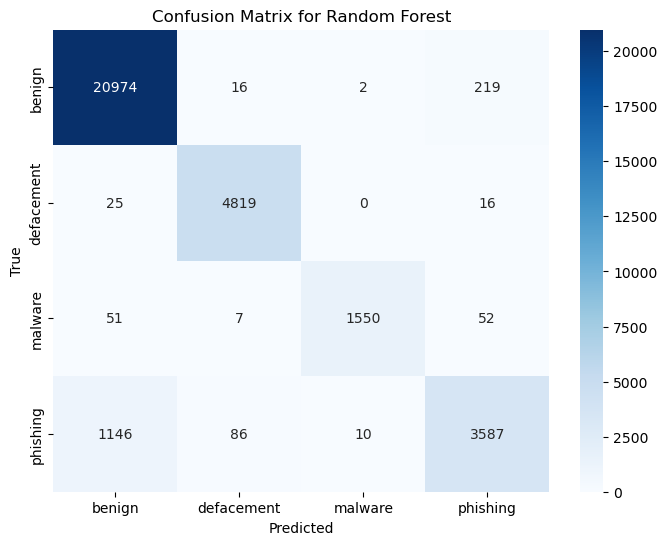

Classification Report for Random Forest:
              precision    recall  f1-score   support

      benign       0.94      0.99      0.97     21211
  defacement       0.98      0.99      0.98      4860
     malware       0.99      0.93      0.96      1660
    phishing       0.93      0.74      0.82      4829

    accuracy                           0.95     32560
   macro avg       0.96      0.91      0.93     32560
weighted avg       0.95      0.95      0.95     32560


Evaluating Naive Bayes...
Accuracy of Naive Bayes model: 0.8539619164619164


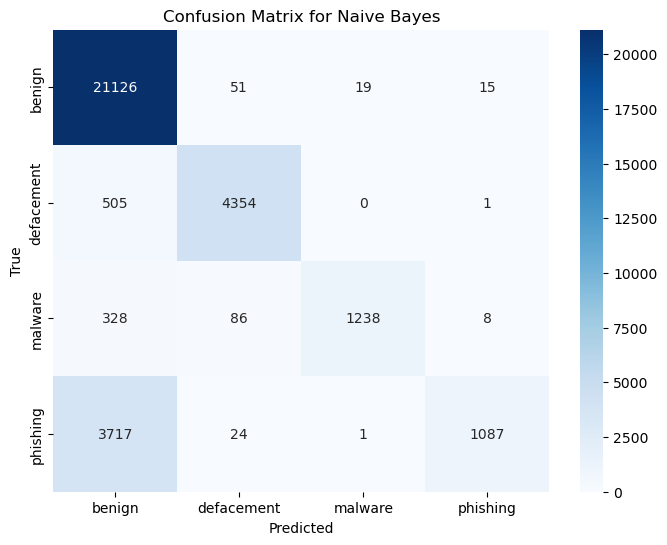

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

      benign       0.82      1.00      0.90     21211
  defacement       0.96      0.90      0.93      4860
     malware       0.98      0.75      0.85      1660
    phishing       0.98      0.23      0.37      4829

    accuracy                           0.85     32560
   macro avg       0.94      0.72      0.76     32560
weighted avg       0.88      0.85      0.82     32560


Evaluating XGBoost...
Accuracy of XGBoost model: 0.9343058968058968


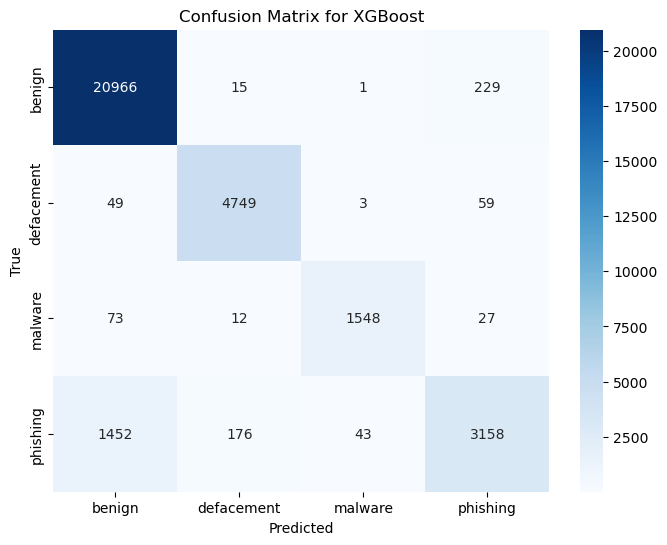

Classification Report for XGBoost:
              precision    recall  f1-score   support

      benign       0.93      0.99      0.96     21211
  defacement       0.96      0.98      0.97      4860
     malware       0.97      0.93      0.95      1660
    phishing       0.91      0.65      0.76      4829

    accuracy                           0.93     32560
   macro avg       0.94      0.89      0.91     32560
weighted avg       0.93      0.93      0.93     32560



In [21]:
# Evaluation
model_performance = {}

# Evaluation - Loading models for prediction and evaluation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    predictions = model.predict(X_test)
    
    # Now, calculate accuracy and confusion matrix
    model_performance[model_name] = accuracy_score(y_test, predictions)
    print(f"Accuracy of {model_name} model: {model_performance[model_name]}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification report
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, predictions, target_names=label_encoder.classes_)}")

After training the machine learning models, we evaluated their performance on the test dataset to measure their predictive accuracy and understand how well they generalize. The evaluation process included accuracy calculation, confusion matrix visualization, and detailed classification reports for each model.

#### **SVM**

#### Overall Model Accuracy
- The **accuracy of the SVM model is 94.16%**, indicating that the model correctly classified 94.16% of the samples in the test dataset.

#### Classification Report Analysis
The classification report provides detailed performance metrics (precision, recall, and F1-score) for each class, along with overall averages.

#### Class-Wise Metrics
1. **Benign**:
   - **Precision**: 0.93 — Out of all samples predicted as "benign," 93% were actually benign.
   - **Recall**: 0.99 — Out of all actual benign samples, 99% were correctly identified.
   - **F1-Score**: 0.96 — High precision and recall lead to a strong F1-score, indicating excellent performance for this class.
   - **Support**: 21,211 — The number of benign samples in the test set.

2. **Defacement**:
   - **Precision**: 0.97 — Out of all samples predicted as "defacement," 97% were correct.
   - **Recall**: 0.99 — Out of all actual defacement samples, 99% were correctly identified.
   - **F1-Score**: 0.98 — Consistently high precision and recall result in an excellent F1-score.
   - **Support**: 4,860 — The number of defacement samples in the test set.

3. **Malware**:
   - **Precision**: 1.00 — All samples predicted as "malware" were correct, with no false positives.
   - **Recall**: 0.93 — Out of all actual malware samples, 93% were correctly identified.
   - **F1-Score**: 0.96 — A perfect precision score combined with slightly lower recall still results in a strong F1-score.
   - **Support**: 1,660 — The number of malware samples in the test set.

4. **Phishing**:
   - **Precision**: 0.92 — Out of all samples predicted as "phishing," 92% were correct.
   - **Recall**: 0.69 — The model identified only 69% of actual phishing samples, suggesting it struggled with this class.
   - **F1-Score**: 0.79 — Lower recall impacts the F1-score, indicating room for improvement in identifying phishing samples.
   - **Support**: 4,829 — The number of phishing samples in the test set.

#### Averaged Metrics
1. **Macro Average**:
   - **Precision**: 0.96 — Average precision across all classes.
   - **Recall**: 0.90 — Average recall across all classes, showing some variability in performance between classes.
   - **F1-Score**: 0.92 — Balances precision and recall, reflecting strong but varied class performance.

2. **Weighted Average**:
   - **Precision/Recall/F1-Score**: 0.94 — These scores are weighted by the number of samples in each class, providing an overall summary of the model's performance.els and determine the most suitable one for deployment.



## **Step 6: Comparison of Models**

### Accuracy Bar Chart
A bar chart is plotted to compare the accuracies of all five models. This visualization helps in identifying the best-performing model at a glance.

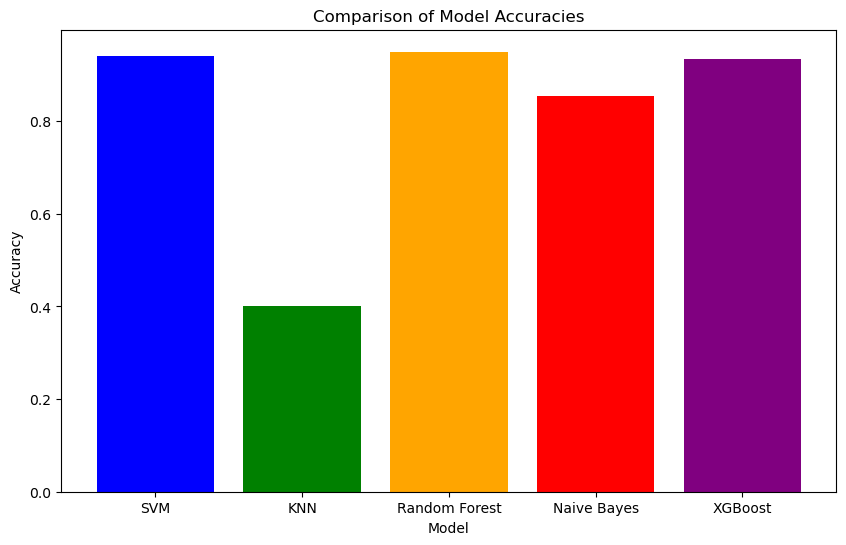

In [22]:
# Plot model performance comparison (accuracy)
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Best Model
The model with the highest accuracy is identified and printed, summarizing the overall findings of the analysis.

In [23]:
# Summary of Model Performances
best_model = max(model_performance, key=model_performance.get)
print(f"The best-performing model is {best_model} with an accuracy of {model_performance[best_model]:.2f}")

The best-performing model is Random Forest with an accuracy of 0.95
